<a href="https://colab.research.google.com/github/jeevanshrestha/Youtube-Comments-ETL-and-Sentiment-Analysis/blob/main/sentiment_analysis_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tqdm
import pandas as pd
from transformers import pipeline
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load the sentiment analysis pipeline using a pre-trained RoBERTa model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=model_name,
    truncation=True,
    max_length=512,
    device=0
)
# Function to process a batch of comments
def analyze_and_map_sentiment_batch(batch):
    try:
        # Ensure the batch has valid comments
        comments = batch["Comment"]
        results = sentiment_pipeline(comments, truncation=True, max_length=512)

        # Map RoBERTa labels to human-readable sentiments
        mapped_results = []
        for result in results:
            label = result["label"]
            if label == "LABEL_2":
                mapped_results.append("positive")
            elif label == "LABEL_1":
                mapped_results.append("neutral")
            elif label == "LABEL_0":
                mapped_results.append("negative")
            else:
                mapped_results.append("unknown")
        return {"Sentiment": mapped_results}
    except Exception as e:
        print(f"Error processing batch: {e}")
        return {"Sentiment": ["unknown"] * len(batch["Comment"])}




In [38]:
df_comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/linkin_park_youtube_comments.csv', index_col=0)

In [39]:
df_comments.dropna(subset='Comment', inplace=True)

In [15]:
from tqdm._tqdm_notebook import tqdm_notebook

In [17]:
# Convert the comments DataFrame to a Hugging Face Dataset
dataset = Dataset.from_pandas(df_comments)

# Apply the sentiment analysis pipeline in batches
tqdm_notebook.pandas(desc="Processing Sentiment in Batches")
results = dataset.map(analyze_and_map_sentiment_batch, batched=True, batch_size=8)

Map:   0%|          | 0/280073 [00:00<?, ? examples/s]

In [40]:
# Add the results back to the original DataFrame
df_comments["Sentiment"] = results["Sentiment"]

In [41]:
df_comments.to_csv('/content/drive/MyDrive/linkin_park_youtube_comments_with_sentiment.csv', index=False)


In [42]:
df_comments.head()

,Video ID,Comment,Commenter,Comment Datetime,Sentiment
0,SRXH9AbT280,Suddently my mind goes into 2000,@achmadamri4967,2024-11-21T04:33:46Z,neutral
1,SRXH9AbT280,Linkin Park lifer here. Huge fan since the fir...,@michaelgilroy5077,2024-11-21T04:13:52Z,positive
2,SRXH9AbT280,"No, she doesn't sound like Chester.\n But she ...",@fernandodelgadomelesio7250,2024-11-21T04:01:17Z,neutral
3,SRXH9AbT280,Man scientology can pay for a lot can&#39;t they?,@bloodedge555,2024-11-21T04:00:01Z,neutral
4,SRXH9AbT280,I don&#39;t connect with the melodies and line...,@nicolasdejesusmoretagonzal5203,2024-11-21T03:56:18Z,negative


In [43]:
df_comments['Sentiment'] = df_comments['Sentiment'].str.capitalize()

In [44]:
df_video = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/linkin_park_youtube.csv', index_col=0)

In [45]:
df = df_video.merge(df_comments[['Video ID', 'Sentiment', 'Comment Datetime']], on='Video ID')

In [46]:
df.head()

,Video ID,Title,Thumbnail URL,Published At,Channel ID,Channel Title,View Count,Like Count,Dislike Count,Sentiment,Comment Datetime
0,SRXH9AbT280,The Emptiness Machine (Official Music Video) -...,https://i.ytimg.com/vi/SRXH9AbT280/default.jpg,2024-11-21T00:29:22Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,65871614,1746087,0,Neutral,2024-11-21T04:33:46Z
1,SRXH9AbT280,The Emptiness Machine (Official Music Video) -...,https://i.ytimg.com/vi/SRXH9AbT280/default.jpg,2024-11-21T00:29:22Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,65871614,1746087,0,Positive,2024-11-21T04:13:52Z
2,SRXH9AbT280,The Emptiness Machine (Official Music Video) -...,https://i.ytimg.com/vi/SRXH9AbT280/default.jpg,2024-11-21T00:29:22Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,65871614,1746087,0,Neutral,2024-11-21T04:01:17Z
3,SRXH9AbT280,The Emptiness Machine (Official Music Video) -...,https://i.ytimg.com/vi/SRXH9AbT280/default.jpg,2024-11-21T00:29:22Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,65871614,1746087,0,Neutral,2024-11-21T04:00:01Z
4,SRXH9AbT280,The Emptiness Machine (Official Music Video) -...,https://i.ytimg.com/vi/SRXH9AbT280/default.jpg,2024-11-21T00:29:22Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,65871614,1746087,0,Negative,2024-11-21T03:56:18Z


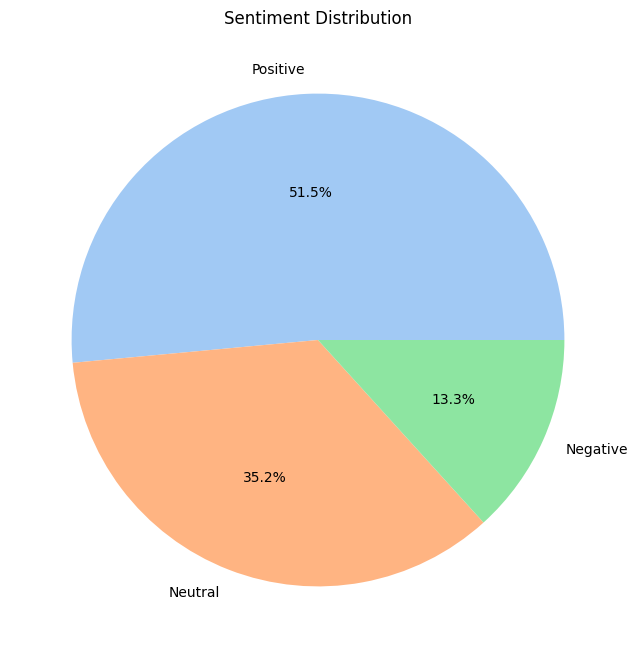

In [47]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a color palette using Seaborn
colors = sns.color_palette('pastel', n_colors=len(sentiment_counts))

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts.values,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=colors
)
plt.title('Sentiment Distribution')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279784 entries, 0 to 279783
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Video ID          279784 non-null  object
 1   Title             279784 non-null  object
 2   Thumbnail URL     279784 non-null  object
 3   Published At      279784 non-null  object
 4   Channel ID        279784 non-null  object
 5   Channel Title     279784 non-null  object
 6   View Count        279784 non-null  int64 
 7   Like Count        279784 non-null  int64 
 8   Dislike Count     279784 non-null  int64 
 9   Sentiment         279784 non-null  object
 10  Comment Datetime  279495 non-null  object
dtypes: int64(3), object(8)
memory usage: 23.5+ MB


In [53]:
# Select the top 10 videos by view count
top_videos = df_video.nlargest(10, 'View Count')
top_videos

,Video ID,Title,Thumbnail URL,Published At,Channel ID,Channel Title,View Count,Like Count,Dislike Count
0,SRXH9AbT280,The Emptiness Machine (Official Music Video) -...,https://i.ytimg.com/vi/SRXH9AbT280/default.jpg,2024-11-21T00:29:22Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,65871614,1746087,0
2,5FrhtahQiRc,Heavy Is The Crown ft. Linkin Park (Official M...,https://i.ytimg.com/vi/5FrhtahQiRc/default.jpg,2024-11-21T00:29:41Z,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,63687895,1124422,0
14,7F5MKaJMxDc,The Emptiness Machine (Live) - Linkin Park,https://i.ytimg.com/vi/7F5MKaJMxDc/default.jpg,2024-11-21T02:32:08Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,17318953,354325,0
12,IL1nlWOciL0,Linkin Park: FROM ZERO (Livestream),https://i.ytimg.com/vi/IL1nlWOciL0/default.jpg,2024-11-21T02:31:37Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,12174058,565924,0
1,kivUsDGWojU,Two Faced (Official Music Video) - Linkin Park,https://i.ytimg.com/vi/kivUsDGWojU/default.jpg,2024-11-21T00:29:34Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,11394160,606893,0
4,fSHoePrnmMw,Over Each Other (Official Music Video) - Linki...,https://i.ytimg.com/vi/fSHoePrnmMw/default.jpg,2024-11-21T00:29:58Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,11365409,450287,0
10,9L_ZdETLgzQ,Heavy Is The Crown (Live) - Linkin Park,https://i.ytimg.com/vi/9L_ZdETLgzQ/default.jpg,2024-11-21T00:31:20Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,10696391,185610,0
6,7i4s-NXfkPk,Numb (Live) - Linkin Park,https://i.ytimg.com/vi/7i4s-NXfkPk/default.jpg,2024-11-21T00:30:23Z,UCZU9T1ceaOgwfLRq7OKFU4Q,Linkin Park,8072828,236301,0
11,WiD6KjygMSs,Linkin Park: The Emptiness Machine | The Tonig...,https://i.ytimg.com/vi/WiD6KjygMSs/default.jpg,2024-11-21T00:31:50Z,UC8-Th83bH_thdKZDJCrn88g,The Tonight Show Starring Jimmy Fallon,4840769,176660,0
13,R8OqqaBwcl8,Linkin Park - Heavy Is The Crown | Worlds 2024...,https://i.ytimg.com/vi/R8OqqaBwcl8/default.jpg,2024-11-21T02:31:59Z,UC2t5bjwHdUX4vM2g8TRDq5g,League of Legends,3700868,123171,0


<ipython-input-56-be820552d02f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


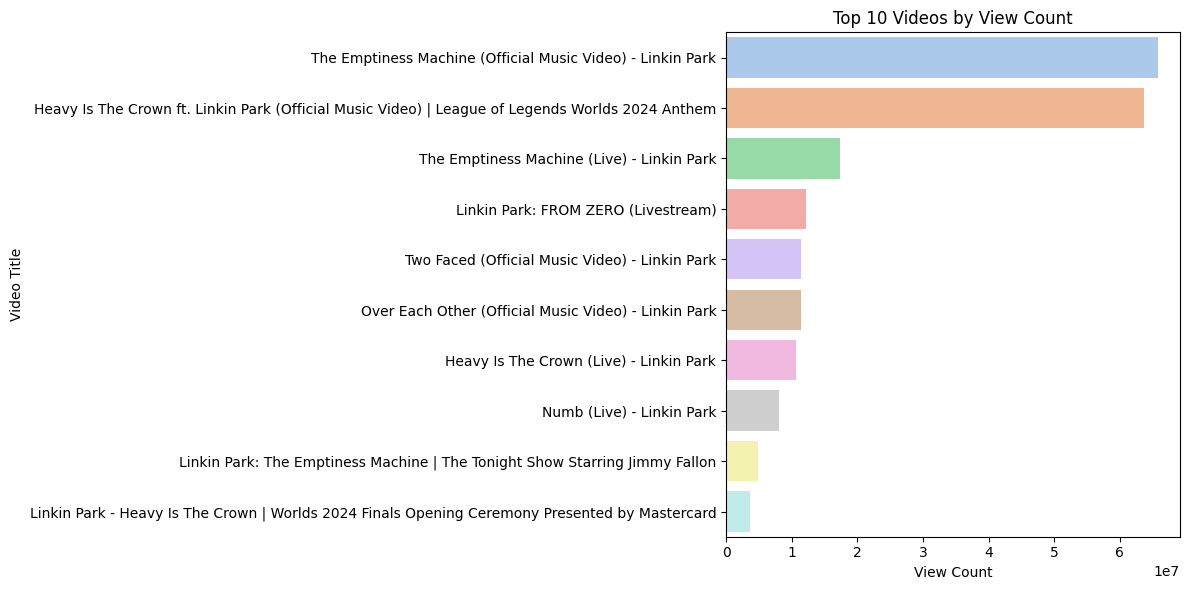

In [56]:

# Create a color palette using Seaborn
colors = sns.color_palette('pastel', n_colors=len(top_videos))

# Plot the horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_videos,
    x='View Count',
    y='Title',
    palette=colors  # Applying the color palette
)
plt.title('Top 10 Videos by View Count')
plt.xlabel('View Count')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  fig.canvas.draw()
<ipython-input-60-3afb414cb8ad>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


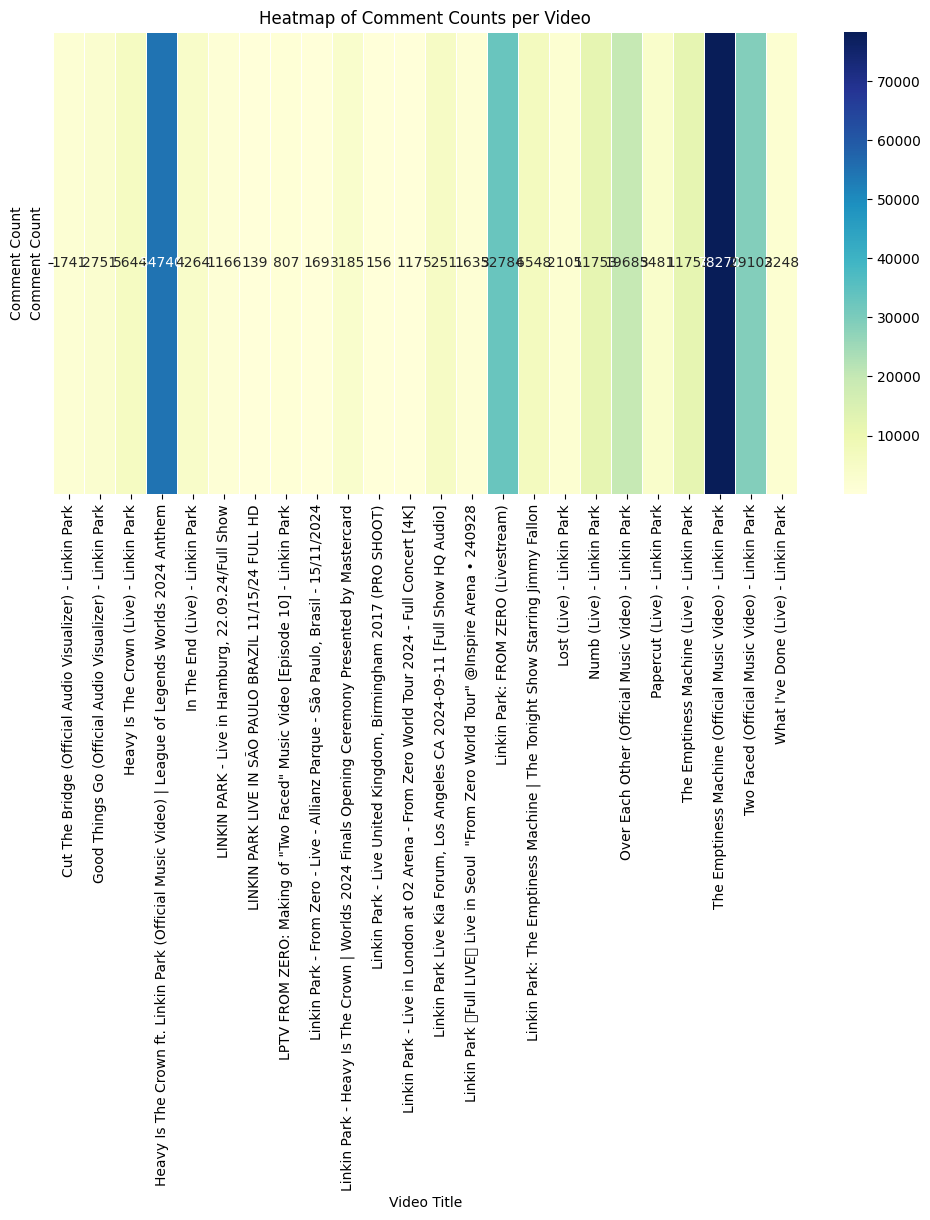

In [60]:

# Convert the data to a pivot table format
heatmap_data = df_comments_per_video.set_index('Video Title').T  # Transpose to make it suitable for a heatmap

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True, fmt='g', linewidths=0.5)

# Add labels and title
plt.title('Heatmap of Comment Counts per Video')
plt.xlabel('Video Title')
plt.ylabel('Comment Count')

plt.tight_layout()
plt.show()

In [67]:
# If you have a large dataset, let's consider plotting the top N videos by comment count
top_comments = df_comments_per_video.nlargest(10,'Comment Count')
top_comments

,Video Title,Comment Count
21,The Emptiness Machine (Official Music Video) -...,78270
3,Heavy Is The Crown ft. Linkin Park (Official M...,54740
14,Linkin Park: FROM ZERO (Livestream),32784
22,Two Faced (Official Music Video) - Linkin Park,29103
18,Over Each Other (Official Music Video) - Linki...,19685
17,Numb (Live) - Linkin Park,11753
20,The Emptiness Machine (Live) - Linkin Park,11753
15,Linkin Park: The Emptiness Machine | The Tonig...,6548
2,Heavy Is The Crown (Live) - Linkin Park,5644
12,"Linkin Park Live Kia Forum, Los Angeles CA 202...",5251


<ipython-input-74-5eb283a64dae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-74-5eb283a64dae>:28: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


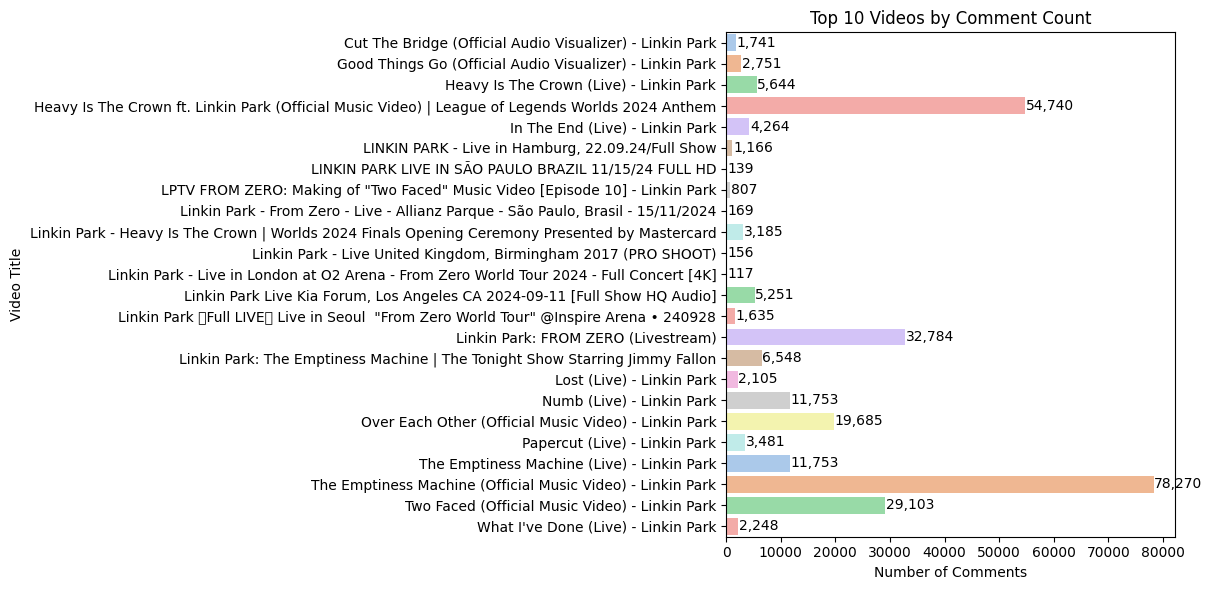

In [74]:
# Create a color palette using Seaborn
colors = sns.color_palette('pastel', n_colors=len(df_comments_per_video))

# Plot the horizontal bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_comments_per_video,
    x='Comment Count',  # Use 'Comment Datetime' or another column for the x-axis
    y='Video Title',
    palette=colors
)

# Add data labels to each bar
for p in ax.patches:
    ax.text(
        p.get_width() + 100,  # X position: slightly to the right of the bar
        p.get_y() + p.get_height() / 2,  # Y position: centered on the bar
        f'{p.get_width():,.0f}',  # The value displayed as a label
        ha='left',  # Horizontal alignment (left of the bar)
        va='center',  # Vertical alignment (centered on the bar)
        fontsize=10  # Font size of the label
    )

# Add titles and labels
plt.title('Top 10 Videos by Comment Count')
plt.xlabel('Number of Comments')
plt.ylabel('Video Title')
plt.tight_layout()

# Show the plot
plt.show()


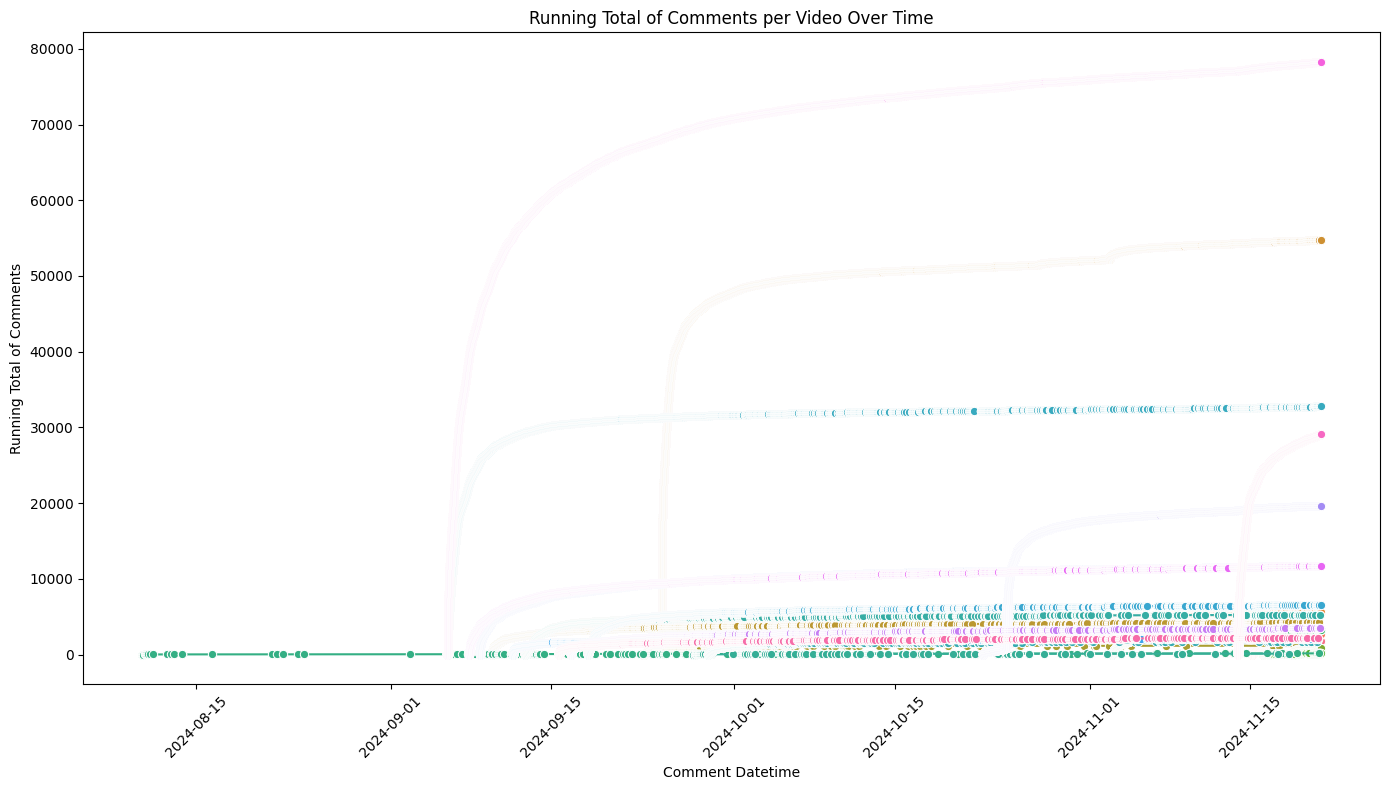

In [81]:

# Make sure 'Comment Datetime' is in datetime format
df['Comment Datetime'] = pd.to_datetime(df['Comment Datetime'], errors='coerce')

comment_counts = df.groupby(['Title', 'Comment Datetime']).size().reset_index(name='Comment Count')

# Sort by 'Comment Datetime' to ensure the timeline is in order
comment_counts = comment_counts.sort_values(by=['Title', 'Comment Datetime'])

# Calculate the running total of comments per video
comment_counts['Running Total'] = comment_counts.groupby('Title')['Comment Count'].cumsum()

# Plot the line chart for each video
plt.figure(figsize=(14, 8))
sns.lineplot(data=comment_counts, x='Comment Datetime', y='Running Total', hue='Title', marker='o', legend=False)

# Add titles and labels
plt.title('Running Total of Comments per Video Over Time')
plt.xlabel('Comment Datetime')
plt.ylabel('Running Total of Comments')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()